Initially, the reference code chose a phenomeno (secondary polynomial) and generated real data and fake data to train a MLP-3 binary classification model, the discriminator. 

Then, a MLP-3 regression model that its outputs have the same shape with the inputs of the discriminator was build to generate forgeries. We call this the generator. 

The generator were trained by concatenating to the discriminator, which means that we optimize the generator to generate data that would pass the discrinator.

After that, the generator would be able to generate data elements that cannot be distinguished by the discriminator. However, it doesn't necessarily mean the generator are capable to imitate the phenomenon because the discriminator were not good enough to have the authority. In this case, we then use data elements generated by the trained generator to re-train the discriminator so that it could recognize the generated elements as forgeries. This would a complete generation.

We then repeat multiple generations so that the discriminator became so good to identify the fake and the generator also became so good to imitate the phenomenon of interest.

In [ ]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles
from keras.models import Sequential
from keras.layers import Dense

# define phenomenon

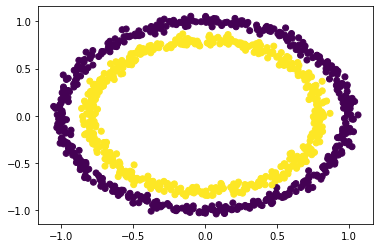

In [ ]:
x,y = make_circles(1000,noise=0.03)
x_real = x
y_real = np.ones(y.shape)
plt.scatter(x_real[:,0],x_real[:,1],c=y)

# build discriminator

In [ ]:
discriminator = Sequential()
discriminator.add(Dense(25,activation="relu",kernel_initializer="he_uniform",input_dim=2))
discriminator.add(Dense(1,activation="sigmoid"))
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 25)                75        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train,y_train = make_circles(1000,noise=0.03)
discriminator.fit(x_train,y_train,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.8703 - accuracy: 0.5176
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7745 - accuracy: 0.5135
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7551 - accuracy: 0.4768
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7316 - accuracy: 0.4734
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7144 - accuracy: 0.4519
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7168 - accuracy: 0.4372
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.4806
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4925
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6961 - accuracy: 0.4901
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6960 - accuracy: 0.4674
Epoch 11/

(250,)
(250,)


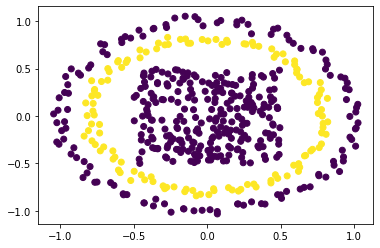

In [ ]:
x_test,y_test = make_circles(250,noise=0.03)
x_gene = np.random.rand(250,2) # generate more different fake elements
x_gene -= 0.5
print(y_test.shape)
y_gene = np.zeros(y_test.shape)
print(y_gene.shape)
x_test2 = np.vstack((x_test,x_gene))
y_test2 = np.concatenate((y_test,y_gene))
plt.scatter(x_test2[:,0],x_test2[:,1],c=y_test2)

In [ ]:
discriminator.evaluate(x_test,y_test)
discriminator.evaluate(x_gene,y_gene)

8/8 [==============================] - 0s 2ms/step - loss: 3.2460 - accuracy: 0.0000e+00


[3.2459845542907715, 0.0]

# build generator


In [ ]:
generator = Sequential()
generator.add(Dense(15,activation="relu",kernel_initializer='he_uniform', input_dim=5))
generator.add(Dense(2,activation="linear"))

# combine generator and discriminator

In [ ]:
discriminator.trainable = False
GAN_1st = Sequential()
GAN_1st.add(generator)
GAN_1st.add(discriminator)
GAN_1st.compile(loss='binary_crossentropy', optimizer='adam')
GAN_1st.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 2)                 122       
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 101       
Total params: 223
Trainable params: 122
Non-trainable params: 101
_________________________________________________________________


# train the GAN

In [ ]:
x_train1 = np.random.randn(1000,5)
y_train1 = np.ones(1000).reshape(1000,1)
GAN_1st.fit(x_train1,y_train1,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 5.4546
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2810
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.9845
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2262
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7921
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6728
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4606
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3406
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2584
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2366
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1676
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1357
Epoch 13/100
32/32 [=================

In [ ]:
x_test1 = np.random.randn(100,5)
y_test1 = np.ones(100).reshape(100,1)
GAN_1st.evaluate(x_test1,y_test1)

4/4 [==============================] - 0s 3ms/step - loss: 0.0212


0.021173156797885895

(100, 2)


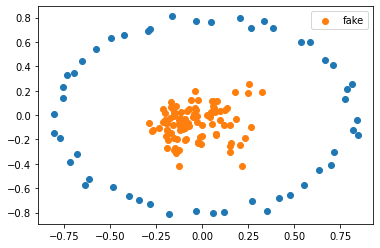

In [ ]:
x_generated = generator.predict(x_test1)
print(x_generated.shape)
x_base, y_base = make_circles(100,noise=0.03)
x_base = x_base[y_base==1]
plt.scatter(x_base[:,0],x_base[:,1])
plt.scatter(x_generated[:,0],x_generated[:,1],label="fake")
plt.legend()

In [ ]:
def showpoints(n,generation):
  x_test = np.random.randn(n,5)
  x_generated = generator.predict(x_test)
  x_base, y_base = make_circles(100,noise=0.03)
  x_base = x_base[y_base==1]
  plt.scatter(x_base[:,0],x_base[:,1])
  plt.scatter(x_generated[:,0],x_generated[:,1],label="generated by GAN")
  plt.legend()
  plt.title("Scatter Plot of Real and Generated Examples for the Target Function After %.2f Generation." %(generation))
  plt.show()

In [ ]:
def train_GAN(generation,train_size,test_size):
  for i in range(generation):
    # train the generator
    train_generator(train_size)
    if i%10 == 0:
      showpoints(test_size,i)
    # train the discriminator
    train_discriminator(train_size)


In [ ]:
def train_generator(train_size):
    discriminator.trainable = False
    x_train = np.random.randn(train_size,5)
    y_train = np.ones(train_size).reshape(train_size,1)
    GAN_1st.fit(x_train,y_train,epochs=100,verbose=0)

In [ ]:
def train_discriminator(train_size):
  discriminator.trainable = True
  x_train = np.random.randn(train_size,5)
  x_generated = generator.predict(x_train)
  y_generated = np.zeros(train_size)
  x,y = make_circles(train_size,noise=0.03)
  x_train = np.vstack((x,x_generated))
  y_train = np.concatenate((y,y_generated))
  discriminator.fit(x_train,y_train,epochs=100,verbose=0)

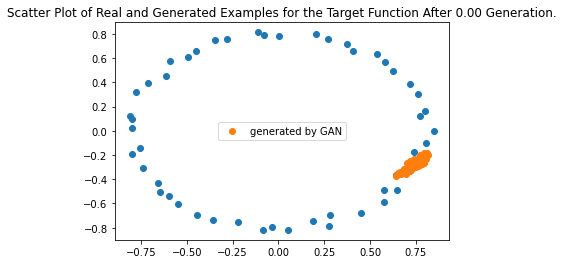

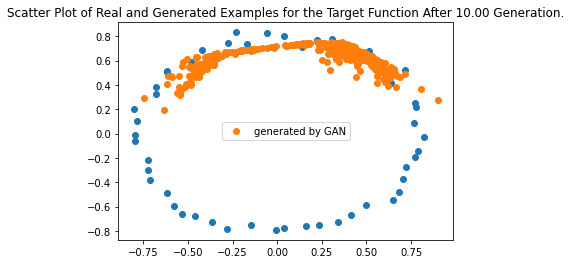

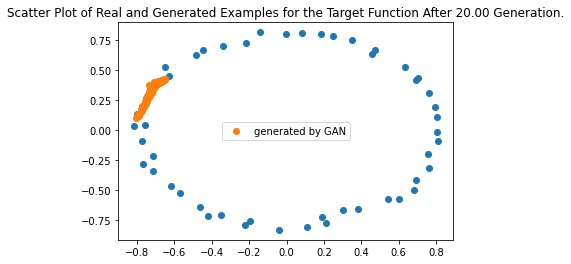

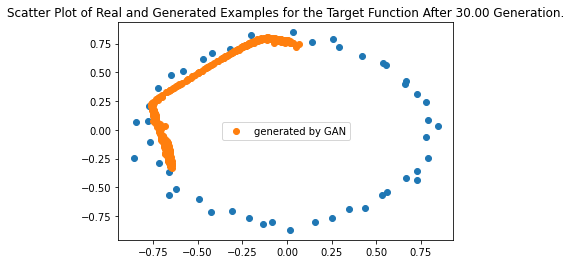

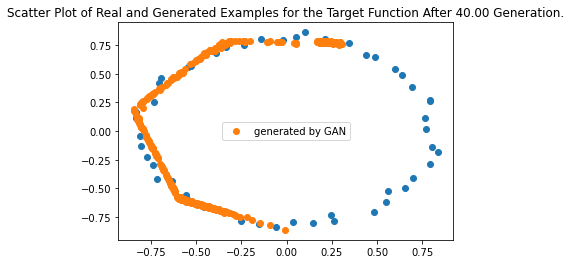

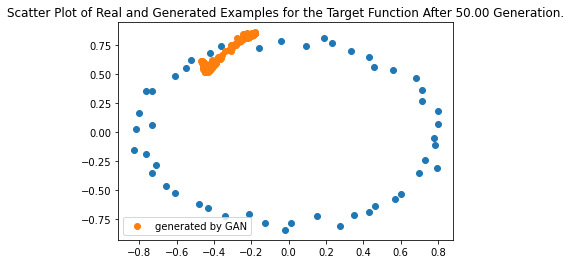

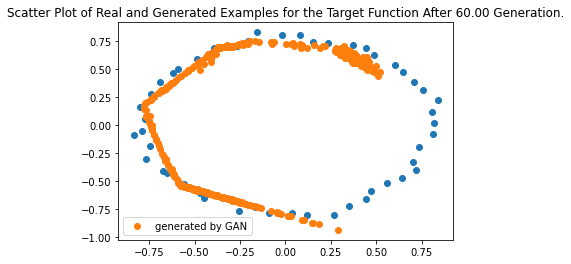

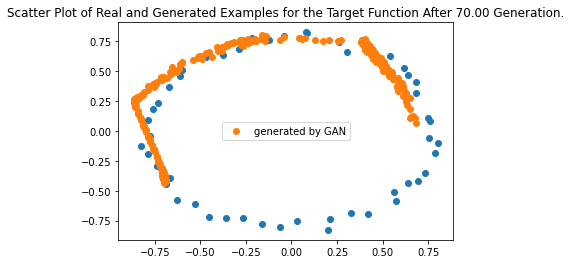

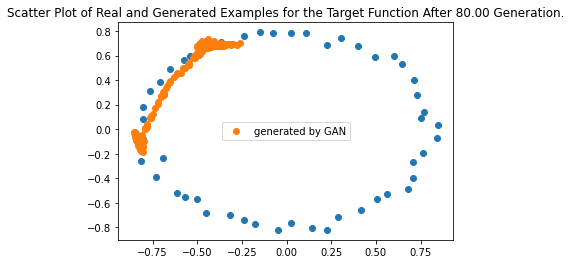

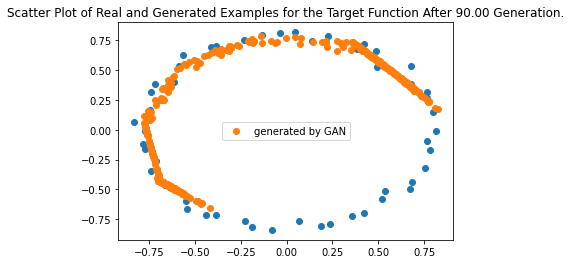

In [ ]:
train_GAN(100,1000,500)